## Завдання 1

In [218]:
import pandas as pd

file_path = "En_In.xls" 

energy = pd.read_excel(file_path, skiprows=17, skipfooter=38)
energy = energy.iloc[:, 2:]
energy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,321,10,78.669280
1,Albania,102,35,100.000000
2,Algeria,1959,51,0.551010
3,American Samoa,...,...,0.641026
4,Andorra,9,121,88.695650
...,...,...,...,...
222,Viet Nam,2554,28,45.321520
223,Wallis and Futuna Islands,0,26,0.000000
224,Yemen,344,13,0.000000
225,Zambia,400,26,99.714670


## Завдання 2

In [220]:
energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply'] *= 1_000_000
energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10,78.669280
1,Albania,1.020000e+08,35,100.000000
2,Algeria,1.959000e+09,51,0.551010
3,American Samoa,NaN,...,0.641026
4,Andorra,9.000000e+06,121,88.695650
...,...,...,...,...
222,Viet Nam,2.554000e+09,28,45.321520
223,Wallis and Futuna Islands,0.000000e+00,26,0.000000
224,Yemen,3.440000e+08,13,0.000000
225,Zambia,4.000000e+08,26,99.714670


## Завдання 3

In [222]:
import re

def clean_country_name(name):
    name = re.sub(r"\s*\(.*\)", "", name)
    name = re.sub(r"\d+", "", name)
    return name.strip()

energy['Country'] = energy['Country'].apply(clean_country_name)
country_rename = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy['Country'] = energy['Country'].replace(country_rename)

energy.loc[energy['Country'].isin(list(country_rename.values()))]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
43,Hong Kong,5.850000e+08,82,0.000000
164,South Korea,1.100700e+10,221,2.279353
214,United Kingdom,7.920000e+09,124,10.600470
216,United States,9.083800e+10,286,11.570980


## Завдання 4

In [224]:
energy.loc[energy['Country'].isin(['American Samoa', 'South Korea', 'Bolivia' ])]

,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


## Завдання 5

In [226]:
gdp_df = pd.read_csv("gpd.csv", header=4)

country_rename_dict = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_df = gdp_df.rename(columns={'Country Name': 'Country'})
gdp_df['Country'] = gdp_df['Country'].replace(country_rename_dict)

gdp_df.loc[gdp_df['Country'].isin(country_rename_dict.values())]

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
93,Hong Kong,HKG,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,1.764691e+10,...,2.019164e+11,2.149698e+11,2.195440e+11,2.141452e+11,2.286377e+11,2.396459e+11,2.437206e+11,2.512081e+11,2.577757e+11,2.638606e+11
109,Iran,IRN,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,5.500820e+10,6.072406e+10,6.552689e+10,7.014134e+10,7.608598e+10,8.904776e+10,...,3.895523e+11,4.250646e+11,4.289909e+11,4.389208e+11,4.677902e+11,4.853309e+11,4.532569e+11,4.445926e+11,4.639027e+11,NaN
123,South Korea,KOR,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,2.757696e+10,2.893825e+10,2.964966e+10,3.247578e+10,3.493136e+10,3.674434e+10,...,9.410199e+11,9.924316e+11,1.020510e+12,1.027730e+12,1.094499e+12,1.134796e+12,1.160809e+12,1.194429e+12,1.234340e+12,1.266580e+12


## Завдання 6

In [228]:
scima = pd.read_excel('scimagojr.xlsx')

scima

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
...,...,...,...,...,...,...,...,...
186,187,Guyana,1,1,0,0,0.00,0
187,188,Christmas Island,1,1,0,0,0.00,0
188,189,Reunion,1,1,2,1,2.00,1
189,190,Saint Lucia,1,1,0,0,0.00,0


## Завдання 7

In [230]:
scimago_top_15 = scima.head(15)
gdp_df = gdp_df[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

merged_df = pd.merge(scimago_top_15, gdp_df, on='Country', how='inner')
merged_df = pd.merge(merged_df, energy, on='Country', how='inner')


final_df = merged_df
final_df.set_index('Country', inplace=True)

final_df.shape

(15, 20)

## Завдання 8

In [232]:
def task_eight():
    avg_df = final_df[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']].mean(axis=1)
    avg_df = avg_df.sort_values(ascending=False)
    return avg_df

task_eight()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64

## Завдання 9

In [234]:
def task_nine():
    target_index = 4
    avg_df = task_eight()
    country = avg_df.index[target_index]
    country_row = final_df.loc[country]
    
    return (country, country_row['2015'] - country_row['2006'])
    
task_nine()

('France', 153345695364.24023)

## Завдання 10

In [236]:
def task_ten():
    max_renewable_country = final_df['% Renewable'].idxmax() 
    max_renewable_value = final_df['% Renewable'].max()
    
    return (max_renewable_country, max_renewable_value)


task_ten()

('Brazil', 69.64803)

## Завдання 11

In [238]:
def task_eleven():
    target_index = 5
    final_df['Estimated Population'] = final_df['Energy Supply'] / final_df['Energy Supply per Capita']
    
    sorted_population = final_df['Estimated Population'].sort_values(ascending=False)
    
    sixth_country = sorted_population.index[target_index]
    sixth_country_population = sorted_population.iloc[target_index]
    
    return (sixth_country, sixth_country_population)

task_eleven()

('Japan', 127409395.97315437)

## Завдання 12

In [240]:
def task_twelve():
    final_df['Cited Docs per Person'] = final_df['Citable documents'] / final_df['Estimated Population']
    correlation = final_df['Cited Docs per Person'].corr(final_df['Energy Supply per Capita'])
    return correlation

task_twelve()

0.7940010435442946

## Завдання 13

In [242]:
def task_thirteen():
    median_renewable = final_df['% Renewable'].median()
    final_df['Renewable Energy Classification'] = (final_df['% Renewable'] >= median_renewable).astype(int)
    df_sorted = final_df.sort_values(by='Rank')
    return df_sorted['Renewable Energy Classification']

task_thirteen()

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Energy Classification, dtype: int32

## Завдання 14

In [244]:
def task_forteen():
    continent_dict = {
        'China':'Asia',
        'United States':'North America',
        'Japan':'Asia',
        'United Kingdom':'Europe',
        'Russian Federation':'Europe',
        'Canada':'North America',
        'Germany':'Europe',
        'India':'Asia',
        'France':'Europe',
        'South Korea':'Asia',
        'Italy':'Europe',
        'Spain':'Europe',
        'Iran':'Asia',
        'Australia':'Australia',
        'Brazil':'South America'
    }
    final_df['Continent'] = final_df.index.map(continent_dict)
    
    result = final_df.groupby('Continent')['Estimated Population'].agg(
        size='size', 
        sum='sum', 
        mean='mean', 
        std='std'
    )
    
    return result

task_forteen()

,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


## Завдання 15

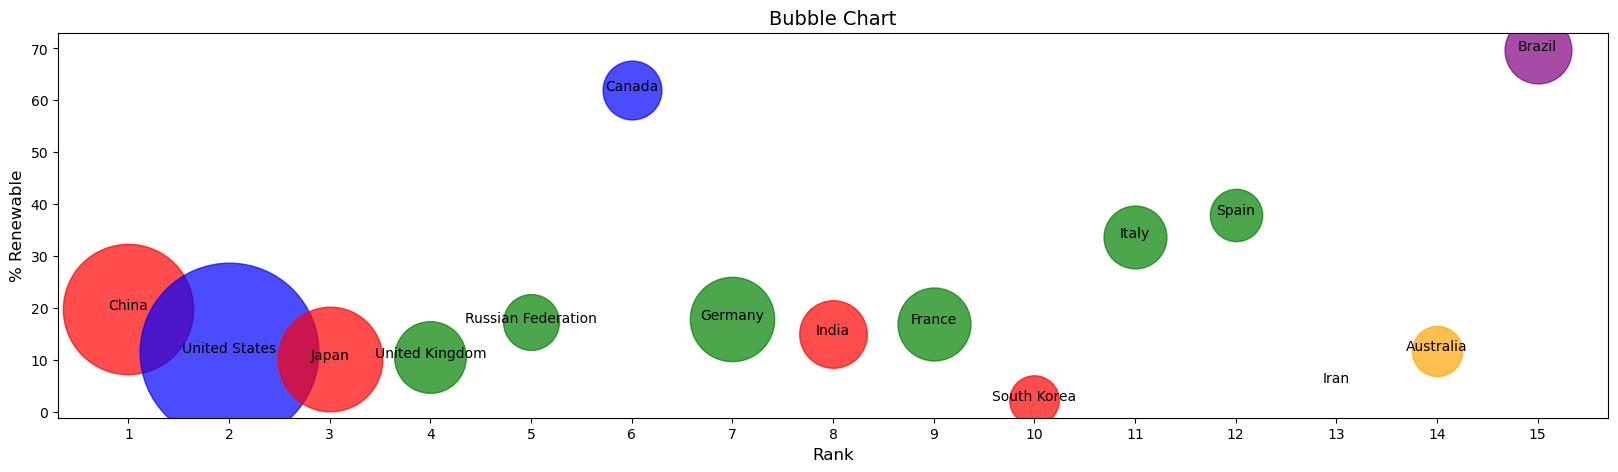

In [246]:
import matplotlib.pyplot as plt
import math

continent_colors = {
    'Asia': 'red',
    'North America': 'blue',
    'Europe': 'green',
    'Australia': 'orange',
    'South America': 'purple'
}

plt.figure(figsize=(20, 5))


for country in final_df.index:

    plt.text(
        final_df.loc[country, 'Rank'], 
        final_df.loc[country, '% Renewable'], 
        country,
        ha='center'          
    )
    plt.scatter(
        final_df.loc[country, 'Rank'],
        final_df.loc[country, '% Renewable'],
        s=0 if math.isnan(final_df.loc[country]['2015']) else final_df.loc[country]['2015'] * 1e-9, 
        c=continent_colors[final_df.loc[country, 'Continent']],
        alpha=0.7   
    )
    
plt.xticks(range(1, len(final_df['Rank']) + 1))
plt.title('Bubble Chart', fontsize=14)
plt.xlabel('Rank', fontsize=12)
plt.ylabel('% Renewable', fontsize=12)

plt.show()